<a href="https://colab.research.google.com/github/bachsykhang/StockPredictVinamilk/blob/main/Vinamilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bước 1: Import thư viện

In [3]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

In [9]:
import datetime as dt
from vnstock import *

# Bước 2: Đọc dữ liệu

In [10]:
start = "2021-01-01"
end = dt.datetime.now().strftime("%Y-%m-%d")

In [23]:
def load_data(company):
    CGT=stock_historical_data(symbol=company,start_date=start,end_date=end,resolution="1D",type="stock",beautify=True, decor=False)
    return CGT

In [24]:
df = load_data("VCB")

# Bước 3: Mô tả dữ liệu

In [25]:
#kích thước dữ liệu
df.shape

(824, 7)

In [26]:
#dữ liệu 5 dòng đầu
df.head()

,time,open,high,low,close,volume,ticker
0,2021-01-04,64269,65450,63810,64930,855900,VCB
1,2021-01-05,64930,65980,64930,65120,739200,VCB
2,2021-01-06,65250,69650,65120,68860,2080400,VCB
3,2021-01-07,68200,71160,68200,70170,889000,VCB
4,2021-01-08,70830,70830,68530,68730,963900,VCB


In [27]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    824 non-null    object
 1   open    824 non-null    int64 
 2   high    824 non-null    int64 
 3   low     824 non-null    int64 
 4   close   824 non-null    int64 
 5   volume  824 non-null    int64 
 6   ticker  824 non-null    object
dtypes: int64(5), object(2)
memory usage: 45.2+ KB


In [28]:
#mô tả bộ dữ liệu
df.describe()

,open,high,low,close,volume
count,824.000000,824.000000,824.000000,824.000000,8.240000e+02
mean,73480.006068,74308.611650,72615.849515,73497.013350,1.249975e+06
std,10509.772866,10491.744133,10542.143771,10537.939918,6.523731e+05
min,53340.000000,55290.000000,52500.000000,52500.000000,1.139000e+05
25%,64890.000000,65420.000000,63910.000000,64780.000000,8.081750e+05
50%,69430.000000,70280.000000,68550.000000,69430.000000,1.106750e+06
75%,83582.500000,84500.000000,82550.000000,84200.000000,1.535750e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,6.274200e+06


# Bước 4: Tiền xử lý dữ liệu

In [31]:
from vnstock import * #import all functions, including functions that provide OHLC data for charting
from vnstock.chart import * # import chart functionsThêm MonthLocator vào để sửa lỗi

fig = candlestick_chart(df, ma_periods=[50,200], show_volume=False, reference_period=300, figure_size=(30, 10),
                        title='VCB - Candlestick Chart with MA and Volume', x_label='Date', y_label='Price',
                        colors=('lightgray', 'gray'), reference_colors=('black', 'blue'))

fig.show()

In [32]:
df1 = pd.DataFrame(df,columns=['time','close'])
df1.index = df1.time
df1.drop('time',axis=1,inplace=True)
df1

,close
time,
2021-01-04,64930
2021-01-05,65120
2021-01-06,68860
2021-01-07,70170
2021-01-08,68730
...,...
2024-04-16,91000
2024-04-17,90500
2024-04-19,90500


In [34]:
#chia tập dữ liệu
data = df1.values
train_data = data[:500]
test_data = data[500:]

In [35]:
data

array([[64930],
       [65120],
       [68860],
       [70170],
       [68730],
       [68530],
       [69250],
       [68730],
       [68140],
       [67680],
       [67750],
       [64930],
       [64989],
       [67550],
       [67550],
       [67220],
       [66170],
       [63880],
       [59420],
       [60990],
       [59740],
       [63290],
       [64860],
       [64860],
       [65580],
       [61710],
       [63750],
       [65580],
       [66890],
       [66430],
       [65980],
       [65580],
       [64340],
       [64400],
       [64400],
       [65060],
       [65120],
       [64530],
       [63810],
       [63220],
       [62430],
       [62300],
       [62630],
       [63160],
       [62830],
       [63160],
       [62760],
       [62700],
       [63940],
       [61780],
       [63610],
       [62830],
       [62110],
       [62370],
       [62240],
       [62500],
       [62170],
       [62170],
       [63550],
       [64140],
       [66890],
       [66830],
       [

In [36]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [37]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [38]:
x_train

[array([0.27683742, 0.28106904, 0.36436526, 0.3935412 , 0.36146993,
        0.35701559, 0.37305122, 0.36146993, 0.34832962, 0.33808463,
        0.33964365, 0.27683742, 0.27815145, 0.33518931, 0.33518931,
        0.32783964, 0.30445434, 0.25345212, 0.15412027, 0.18908686,
        0.16124722, 0.2403118 , 0.2752784 , 0.2752784 , 0.29131403,
        0.20512249, 0.25055679, 0.29131403, 0.32048998, 0.31024499,
        0.30022272, 0.29131403, 0.2636971 , 0.26503341, 0.26503341,
        0.27973274, 0.28106904, 0.26792873, 0.2518931 , 0.23875278,
        0.22115813, 0.21826281, 0.22561247, 0.23741648, 0.23006682,
        0.23741648, 0.2285078 , 0.22717149, 0.25478842, 0.20668151]),
 array([0.28106904, 0.36436526, 0.3935412 , 0.36146993, 0.35701559,
        0.37305122, 0.36146993, 0.34832962, 0.33808463, 0.33964365,
        0.27683742, 0.27815145, 0.33518931, 0.33518931, 0.32783964,
        0.30445434, 0.25345212, 0.15412027, 0.18908686, 0.16124722,
        0.2403118 , 0.2752784 , 0.2752784 , 0.

In [39]:
y_train

[0.24743875278396432,
 0.230066815144766,
 0.21403118040089075,
 0.21982182628062352,
 0.21692650334075703,
 0.2227171492204898,
 0.2153674832962138,
 0.2153674832962138,
 0.24610244988864127,
 0.25924276169265026,
 0.320489977728285,
 0.319153674832962,
 0.319153674832962,
 0.2913140311804008,
 0.25478841870824054,
 0.2752783964365255,
 0.25478841870824054,
 0.27238307349665924,
 0.25478841870824054,
 0.23741648106904223,
 0.26946547884187066,
 0.33518930957683724,
 0.33518930957683724,
 0.34966592427616927,
 0.2708240534521158,
 0.27683741648106897,
 0.27683741648106897,
 0.2913140311804008,
 0.27815144766146993,
 0.3089086859688195,
 0.2810690423162583,
 0.24743875278396432,
 0.26369710467706,
 0.2605790645879731,
 0.25189309576837404,
 0.24454342984409783,
 0.24610244988864127,
 0.2329621380846325,
 0.2124721603563473,
 0.2051224944320711,
 0.27683741648106897,
 0.24454342984409783,
 0.2534521158129175,
 0.2884187082405345,
 0.29710467706013355,
 0.27238307349665924,
 0.28550111358

In [40]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

# Bước 5: Xây dựng và huấn luyện mô hình

In [41]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

2024-04-24 06:13:23.507736: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-24 06:13:23.508011: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-24 06:13:23.508022: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-24 06:13:23.508483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-24 06:13:23.508997: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/luonghaidang/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequent

In [43]:
#huấn luyện mô hình
save_model = "/Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100


2024-04-24 06:18:13.785692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.



Epoch 1: loss improved from inf to 0.12952, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 6s - 667ms/step - loss: 0.1295
Epoch 2/100

Epoch 2: loss improved from 0.12952 to 0.06901, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 0s - 34ms/step - loss: 0.0690
Epoch 3/100

Epoch 3: loss improved from 0.06901 to 0.06014, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 0s - 33ms/step - loss: 0.0601
Epoch 4/100

Epoch 4: loss improved from 0.06014 to 0.05228, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 0s - 32ms/step - loss: 0.0523
Epoch 5/100

Epoch 5: loss did not improve from 0.05228
9/9 - 0s - 29ms/step - loss: 0.0530
Epoch 6/100

Epoch 6: loss did not improve from 0.05228
9/9 - 0s - 29ms/step - loss: 0.0525
Epoch 7/100

Epoch 7: loss improved from 0.05228 to 0.05053, saving model to /Users/luonghaidang/Documents/GR1/


Epoch 65: loss improved from 0.03094 to 0.03068, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 0s - 37ms/step - loss: 0.0307
Epoch 66/100

Epoch 66: loss did not improve from 0.03068
9/9 - 0s - 35ms/step - loss: 0.0328
Epoch 67/100

Epoch 67: loss did not improve from 0.03068
9/9 - 0s - 38ms/step - loss: 0.0313
Epoch 68/100

Epoch 68: loss did not improve from 0.03068
9/9 - 0s - 34ms/step - loss: 0.0329
Epoch 69/100

Epoch 69: loss improved from 0.03068 to 0.03005, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 0s - 32ms/step - loss: 0.0300
Epoch 70/100

Epoch 70: loss did not improve from 0.03005
9/9 - 0s - 29ms/step - loss: 0.0315
Epoch 71/100

Epoch 71: loss improved from 0.03005 to 0.02898, saving model to /Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras
9/9 - 0s - 35ms/step - loss: 0.0290
Epoch 72/100

Epoch 72: loss did not improve from 0.02898
9/9 - 0s - 32ms/step - loss: 0.03

In [44]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("/Users/luonghaidang/Documents/GR1/dự đoán giá/save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


# Bước 6: Tái sử dụng mô hình

In [45]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


# Độ chính xác của mô hình

/var/folders/r2/xqb_q1bs7rdg9r7c1t36hh_00000gn/T/ipykernel_47445/151225193.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/xqb_q1bs7rdg9r7c1t36hh_00000gn/T/ipykernel_47445/151225193.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



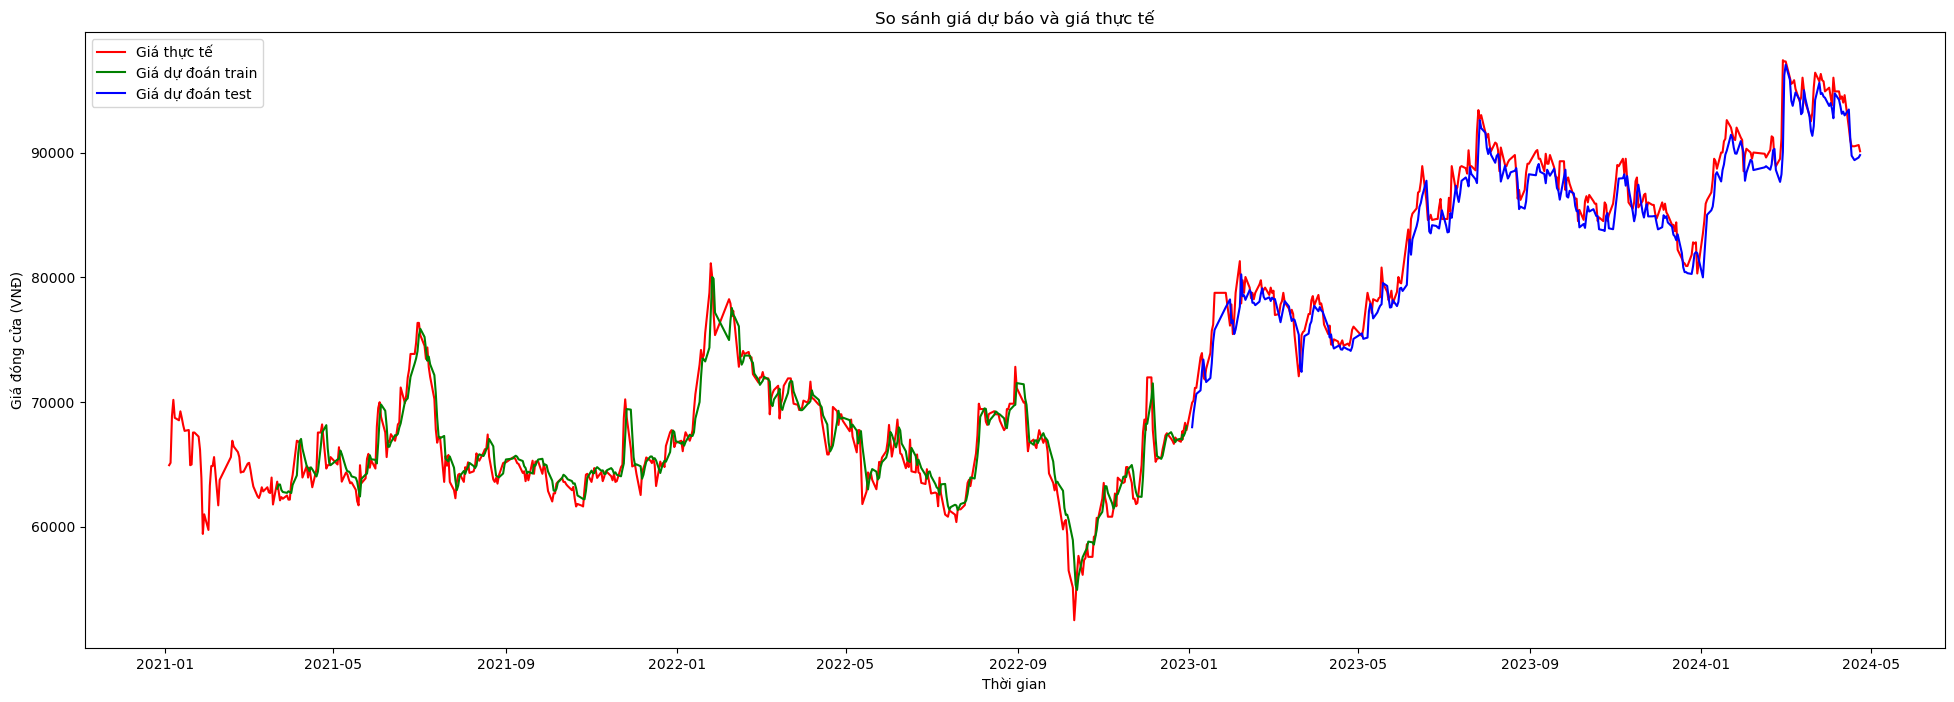

In [47]:
#lập biểu đồ so sánh
train_data1 = df1[50:500]
test_data1 = df1[500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [48]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.8992630969516481
Sai số tuyệt đối trung bình trên tập train (VNĐ): 948.1785763888889
Phần trăm sai số tuyệt đối trung bình tập train: 0.014372583700729472


In [49]:
train_data1

,close,Dự đoán
time,,
2021-03-22,63610,63048.808594
2021-03-23,62830,63383.339844
2021-03-24,62110,63380.910156
2021-03-25,62370,62943.652344
2021-03-26,62240,62780.617188
...,...,...
2022-12-27,67650,66981.882812
2022-12-27,66980,67382.695312
2022-12-28,67740,67270.273438


In [50]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9463216945521983
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1168.6316550925926
Phần trăm sai số tuyệt đối trung bình tập test: 0.013735316741946488


In [ ]:
test_data1

# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)